In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pydataset import data
import os
import env
import acquire 
import prepare

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

In [2]:
titan = acquire.get_titanic_data()

In [3]:
titan.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
titan = prepare.prep_titanic(titan)

In [5]:
titan.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_Southhampton
0,0,3,male,1,0,7.2500,Southampton,0,0,1,0,0,1,0
1,1,1,female,1,0,71.2833,Cherbourg,0,1,0,1,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,1,0,0,0,1,0
3,1,1,female,1,0,53.1000,Southampton,0,1,0,0,0,1,0
4,0,3,male,0,0,8.0500,Southampton,1,0,1,0,0,1,0


In [6]:
# Dropping Object data type values. Will not work in model.
titan.drop(['sex', 'embark_town'], axis=1, inplace=True)

In [7]:
titan.head(2)

,survived,pclass,sibsp,parch,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_Southhampton
0,0,3,1,0,7.2500,0,0,1,0,0,1,0
1,1,1,1,0,71.2833,0,1,0,1,0,0,0


In [8]:
train, val, test = prepare.split_data(df=titan, target='survived')

In [9]:
train.shape, val.shape, test.shape

((498, 12), (214, 12), (179, 12))

In [10]:
baseline_train = train

In [11]:
baseline_train['baseline'] = 0

In [12]:
baseline = accuracy_score(baseline_train.survived, baseline_train.baseline)
baseline

0.6164658634538153

In [13]:
train.drop(['baseline'], axis=1, inplace=True)

In [14]:
X_train = train.drop(['survived'], axis=1)
y_train = train.survived

X_val = val.drop(['survived'], axis=1)
y_val = val.survived

X_test = test.drop(['survived'], axis=1)
y_test = test.survived


### Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [15]:
# Make the Tree

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')


In [16]:
# Fit the Tree

knn.fit(X_train, y_train)


KNeighborsClassifier()

In [17]:
y_pred = knn.predict(X_train)

In [18]:
y_pred_val = knn.predict(X_val)

In [19]:
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Evaluate your results using the model score, confusion matrix, and classification report.

In [20]:
# Training accuracy

print('Train Accuracy')
print(knn.score(X_train, y_train))
print('-----------\n')
print('Validate Accuracy')
print(knn.score(X_val, y_val))

Train Accuracy
0.821285140562249
-----------

Validate Accuracy
0.7289719626168224


In [21]:
# Confusion Matrix

confuse = confusion_matrix(y_train, y_pred, labels=knn.classes_ )
confuse


array([[267,  40],
       [ 49, 142]])

In [22]:
tn = 267
fp = 40
fn = 49
tp = 142

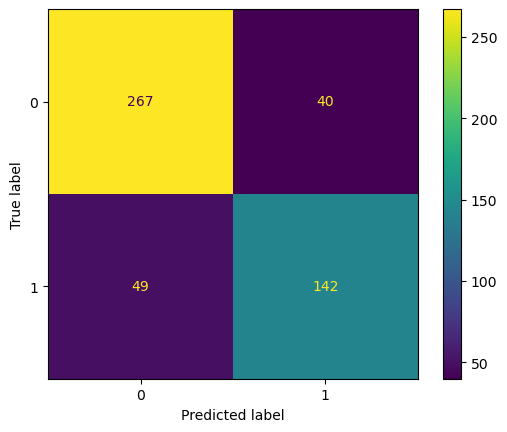

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=confuse, display_labels=knn.classes_ )
disp.plot()

In [24]:
print('Train Classification Report')
print('===========================')
print(classification_report(y_train, y_pred))

Train Classification Report
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       307
           1       0.78      0.74      0.76       191

    accuracy                           0.82       498
   macro avg       0.81      0.81      0.81       498
weighted avg       0.82      0.82      0.82       498



In [25]:
print('Validate Classification Report')
print('==============================')
print(classification_report(y_val, y_pred_val))

Validate Classification Report
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       132
           1       0.65      0.62      0.64        82

    accuracy                           0.73       214
   macro avg       0.71      0.71      0.71       214
weighted avg       0.73      0.73      0.73       214



### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [26]:
# Accuracy Score

print('Train Accuracy')
print(knn.score(X_train, y_train))
print('-----------\n')
print('Validate Accuracy')
print(knn.score(X_val, y_val))

Train Accuracy
0.821285140562249
-----------

Validate Accuracy
0.7289719626168224


In [27]:
tn = 267
fp = 40
fn = 49
tp = 142

### Run through steps 1-3 setting k to 10

In [28]:
knn10 = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [29]:
knn10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [30]:
# Comparing Train scores between 5 neighbors and 10 neighbors
print('Train')
print('===================\n')
print('Five Neighbors')
print(knn.score(X_train, y_train))
print('-------------------\n')
print('Ten Neighbors')
print(knn10.score(X_train, y_train))

Train

Five Neighbors
0.821285140562249
-------------------

Ten Neighbors
0.7891566265060241


In [31]:
# Comparing Validate scores between 5 neighbors and 10 neighbors
print('Validate')
print('===================\n')
print('Five Neighbors')
print(knn.score(X_val, y_val))
print('-------------------\n')
print('Ten Neighbors')
print(knn10.score(X_val, y_val))

Validate

Five Neighbors
0.7289719626168224
-------------------

Ten Neighbors
0.7242990654205608


In [32]:
y_pred10 = knn10.predict(X_train)

In [33]:
print('Ten Neighbors Classification Report')
print('====================================\n')
print(classification_report(y_train, y_pred10))

Ten Neighbors Classification Report

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       307
           1       0.76      0.65      0.70       191

    accuracy                           0.79       498
   macro avg       0.78      0.76      0.77       498
weighted avg       0.79      0.79      0.79       498



In [34]:
confusion_matrix(y_train, y_pred10)

array([[268,  39],
       [ 66, 125]])

### Run through steps 1-3 setting k to 20

In [35]:
knn20 = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [36]:
knn20.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [37]:
# Comparing Train scores between 5, 10, and 20 neighbors
print('Train')
print('===================\n')
print('Five Neighbors')
print(knn.score(X_train, y_train))
print('-------------------\n')
print('Ten Neighbors')
print(knn10.score(X_train, y_train))
print('-------------------\n')
print('Twenty Neighbors')
print(knn20.score(X_train, y_train))

Train

Five Neighbors
0.821285140562249
-------------------

Ten Neighbors
0.7891566265060241
-------------------

Twenty Neighbors
0.7349397590361446


In [38]:
# Comparing Validate scores between 5 neighbors and 10 neighbors
print('Validate')
print('===================\n')
print('Five Neighbors')
print(knn.score(X_val, y_val))
print('-------------------\n')
print('Ten Neighbors')
print(knn10.score(X_val, y_val))
print('-------------------\n')
print('Twenty Neighbors')
print(knn20.score(X_val, y_val))

Validate

Five Neighbors
0.7289719626168224
-------------------

Ten Neighbors
0.7242990654205608
-------------------

Twenty Neighbors
0.6588785046728972


In [39]:
y_pred20 = knn20.predict(X_val)

In [40]:
print('Twenty Neighbors Classification Report')
print('=======================================\n')
print(classification_report(y_val, y_pred20))

Twenty Neighbors Classification Report

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       132
           1       0.57      0.43      0.49        82

    accuracy                           0.66       214
   macro avg       0.63      0.61      0.62       214
weighted avg       0.65      0.66      0.65       214



In [41]:
confusion_matrix(y_val, y_pred20)

array([[106,  26],
       [ 47,  35]])

### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [42]:
# Create a 'for loop' to create a dataframe in which I can plot a lineplot. 

the_neighborhood = []

for i in range(5, 21, 5):
    # Make the neighborhood
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    
    # Fit the model. Where those neihbors will be at.
    knn.fit(X_train, y_train)
    
    # Accuracy Score for train
    train_acc = knn.score(X_train, y_train)
    
    # Accuracy Score for validate
    val_acc = knn.score(X_val, y_val)
    
    #Dictionary that will be appended to an empty list (the_neighborhood).
    output = {'n_neighbors': i, 
              'train_accuracy': train_acc,
              'validate_accuracy': val_acc}
    
    the_neighborhood.append(output)

neighborhood = pd.DataFrame(the_neighborhood)
    
    

In [43]:
# Dataframe for neighbors of 5, 10, 15, and 20. 
neighborhood

,n_neighbors,train_accuracy,validate_accuracy
0,5,0.821285,0.728972
1,10,0.789157,0.724299
2,15,0.777108,0.682243
3,20,0.734940,0.658879


In [44]:
# Creating a column for difference of train_accuracy and validate_accuracy

neighborhood['difference'] = neighborhood.train_accuracy - neighborhood.validate_accuracy

In [45]:
neighborhood

,n_neighbors,train_accuracy,validate_accuracy,difference
0,5,0.821285,0.728972,0.092313
1,10,0.789157,0.724299,0.064858
2,15,0.777108,0.682243,0.094865
3,20,0.734940,0.658879,0.076061


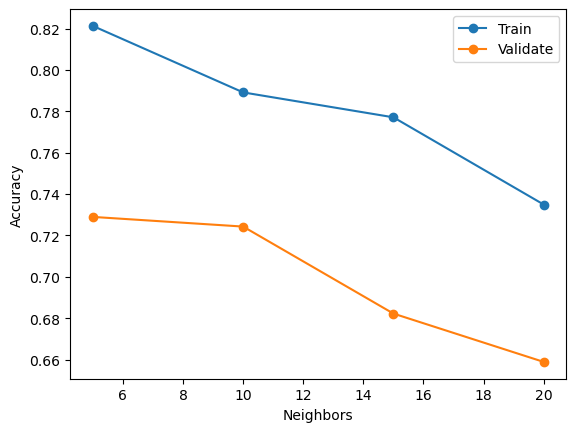

In [46]:
plt.plot(neighborhood.n_neighbors, neighborhood.train_accuracy, marker='o', label='Train')
plt.plot(neighborhood.n_neighbors, neighborhood.validate_accuracy, marker='o', label='Validate')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.legend()

### Which model performs best on our out-of-sample data from validate?

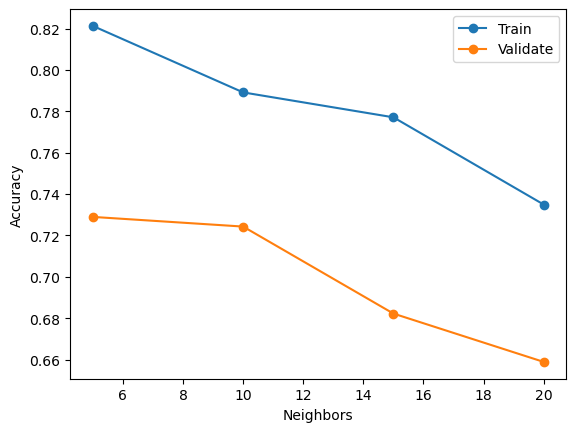

In [47]:
plt.plot(neighborhood.n_neighbors, neighborhood.train_accuracy, marker='o', label='Train')
plt.plot(neighborhood.n_neighbors, neighborhood.validate_accuracy, marker='o', label='Validate')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.legend()